In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start= '2011-02-02'
end= '2022-01-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-02-01,12.344643,12.177857,12.189286,12.322500,426633200.0,10.551438
2011-02-02,12.330357,12.269643,12.301786,12.297143,258955200.0,10.529726
2011-02-03,12.294286,12.091071,12.278571,12.265714,393797600.0,10.502811
2011-02-04,12.382143,12.268214,12.272857,12.375000,321840400.0,10.596395
2011-02-07,12.616071,12.415714,12.424643,12.567143,485021600.0,10.760919


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-25,162.759995,157.020004,158.979996,159.779999,115798400.0,159.576691
2022-01-26,164.389999,157.820007,163.500000,159.690002,108275300.0,159.486801
2022-01-27,163.839996,158.279999,162.449997,159.220001,121954600.0,159.017410
2022-01-28,170.350006,162.800003,165.710007,170.330002,179935700.0,170.113266
2022-01-31,175.000000,169.509995,170.160004,174.779999,115541600.0,174.557602


In [4]:
df.shape

(2769, 6)

In [5]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-02-01,12.344643,12.177857,12.189286,12.322500,426633200.0,10.551438
1,2011-02-02,12.330357,12.269643,12.301786,12.297143,258955200.0,10.529726
2,2011-02-03,12.294286,12.091071,12.278571,12.265714,393797600.0,10.502811
3,2011-02-04,12.382143,12.268214,12.272857,12.375000,321840400.0,10.596395
4,2011-02-07,12.616071,12.415714,12.424643,12.567143,485021600.0,10.760919


In [6]:
df=df.drop(['Date','Adj Close'],axis=1)

In [7]:
df

,High,Low,Open,Close,Volume
0,12.344643,12.177857,12.189286,12.322500,426633200.0
1,12.330357,12.269643,12.301786,12.297143,258955200.0
2,12.294286,12.091071,12.278571,12.265714,393797600.0
3,12.382143,12.268214,12.272857,12.375000,321840400.0
4,12.616071,12.415714,12.424643,12.567143,485021600.0
...,...,...,...,...,...
2764,162.759995,157.020004,158.979996,159.779999,115798400.0
2765,164.389999,157.820007,163.500000,159.690002,108275300.0
2766,163.839996,158.279999,162.449997,159.220001,121954600.0
2767,170.350006,162.800003,165.710007,170.330002,179935700.0


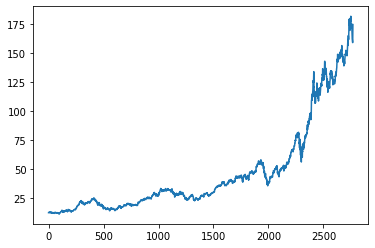

In [8]:
plt.plot(df.Close)

In [9]:
df.describe()



,High,Low,Open,Close,Volume
count,2769.000000,2769.000000,2769.000000,2769.000000,2.769000e+03
mean,47.373833,46.396497,46.881185,46.903672,2.371586e+08
std,40.115804,39.173681,39.636978,39.665150,1.930507e+08
min,11.346429,11.089286,11.310000,11.261429,4.100000e+07
25%,21.044643,20.622856,20.876429,20.879286,1.053504e+08
50%,30.537500,30.070000,30.277500,30.325001,1.654288e+08
75%,52.209999,51.264999,51.757500,51.847500,3.076080e+08
max,182.940002,179.119995,182.630005,182.009995,1.506120e+09


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2764    158.0950
2765    158.1554
2766    158.2046
2767    158.3410
2768    158.5377
Name: Close, Length: 2769, dtype: float64

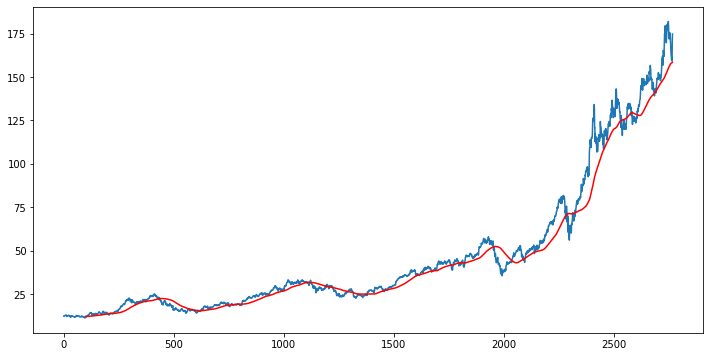

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2764    147.67540
2765    147.80170
2766    147.93765
2767    148.11680
2768    148.31990
Name: Close, Length: 2769, dtype: float64

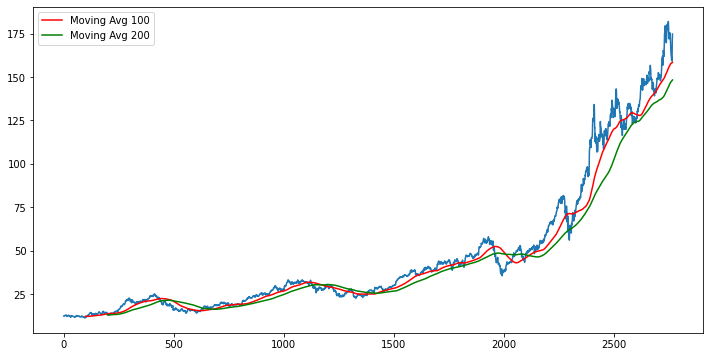

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r', label='Moving Avg 100')
plt.plot(ma200,'g',label='Moving Avg 200')
plt.legend()

In [14]:
##Spliting of data
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


In [15]:
data_training.shape,data_testing.shape

((1938, 1), (831, 1))

In [16]:
data_training

,Close
0,12.322500
1,12.297143
2,12.265714
3,12.375000
4,12.567143
...,...
1933,56.072498
1934,55.942501
1935,56.717499
1936,54.090000


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02269377],
       [0.02215144],
       [0.02147924],
       ...,
       [0.97219606],
       [0.91600018],
       [0.90578758]])

In [19]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)

In [20]:
x_train,y_train


(array([[[0.02269377],
         [0.02215144],
         [0.02147924],
         ...,
         [0.00762314],
         [0.00556841],
         [0.01215274]],
 
        [[0.02215144],
         [0.02147924],
         [0.02381661],
         ...,
         [0.00556841],
         [0.01215274],
         [0.00842518]],
 
        [[0.02147924],
         [0.02381661],
         [0.0279261 ],
         ...,
         [0.01215274],
         [0.00842518],
         [0.01277144]],
 
        ...,
 
        [[0.75896178],
         [0.75532585],
         [0.7623838 ],
         ...,
         [0.97818464],
         [0.95840105],
         [0.95562072]],
 
        [[0.75532585],
         [0.7623838 ],
         [0.75987075],
         ...,
         [0.95840105],
         [0.95562072],
         [0.97219606]],
 
        [[0.7623838 ],
         [0.75987075],
         [0.76628701],
         ...,
         [0.95562072],
         [0.97219606],
         [0.91600018]]]),
 array([0.00842518, 0.01277144, 0.01523101, ..., 0.9721

In [21]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences= True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))
 
    
model.add(LSTM(units = 120, activation='relu' ))
model.add(Dropout(0.5 ))


model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
58/58 [==============================] - 32s 317ms/step - loss: 0.0275
Epoch 2/50
58/58 [==============================] - 19s 325ms/step - loss: 0.0059
Epoch 3/50
58/58 [==============================] - 19s 326ms/step - loss: 0.0058
Epoch 4/50
58/58 [==============================] - 19s 320ms/step - loss: 0.0053
Epoch 5/50
58/58 [==============================] - 18s 314ms/step - loss: 0.0051
Epoch 6/50
58/58 [==============================] - 18s 308ms/step - loss: 0.0045
Epoch 7/50
58/58 [==============================] - 17s 294ms/step - loss: 0.0048
Epoch 8/50
58/58 [==============================] - 16s 268ms/step - loss: 0.0045
Epoch 9/50
58/58 [==============================] - 12s 208ms/step - loss: 0.0040
Epoch 10/50
58/58 [==============================] - 13s 228ms/step - loss: 0.0037
Epoch 11/50
58/58 [==============================] - 12s 207ms/step - loss: 0.0036
Epoch 12/50
58/58 [==============================] - 12s 211ms/step - loss: 0.0036
Epoch 13/50
5

In [25]:
 model.save('keras_model.h5')

In [26]:
 data_testing.head()

,Close
1938,55.527500
1939,54.340000
1940,55.537498
1941,55.297501
1942,54.005001


In [27]:
## for predicting 1938th row closing price we need its upper 100 rows
## so we append it from training data


In [28]:
past_100_days=data_training.tail(100)

In [29]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [30]:
final_df

,Close
0,46.790001
1,47.090000
2,47.037498
3,47.145000
4,46.974998
...,...
926,159.779999
927,159.690002
928,159.220001
929,170.330002


In [31]:
input_data=scaler.fit_transform(final_df)

In [32]:
input_data

array([[0.07676027],
       [0.07880857],
       [0.0784501 ],
       [0.07918409],
       [0.07802337],
       [0.07734062],
       [0.07626525],
       [0.08201759],
       [0.08473159],
       [0.08725783],
       [0.08840146],
       [0.08751388],
       [0.08450968],
       [0.08370743],
       [0.0854997 ],
       [0.08280276],
       [0.08297346],
       [0.07962788],
       [0.07945721],
       [0.07425109],
       [0.07563369],
       [0.07385851],
       [0.07293675],
       [0.06824272],
       [0.07210035],
       [0.0716395 ],
       [0.07392677],
       [0.07326107],
       [0.07679439],
       [0.07122983],
       [0.07375607],
       [0.07814287],
       [0.08259794],
       [0.08220535],
       [0.07798925],
       [0.08336605],
       [0.08387813],
       [0.08316122],
       [0.08408295],
       [0.08229068],
       [0.08481694],
       [0.08406589],
       [0.08435606],
       [0.08672868],
       [0.08983529],
       [0.08879407],
       [0.0832807 ],
       [0.081

In [33]:
input_data.shape

(931, 1)

In [34]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [35]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [36]:
print(x_test.shape,y_test.shape)

(831, 100, 1) (831,)


In [37]:
y_predicted=model.predict(x_test)

In [38]:
y_predicted.shape

(831, 1)

In [39]:
y_test

array([0.13641717, 0.1283093 , 0.13648544, 0.13484681, 0.12602203,
       0.13163779, 0.13392506, 0.13747546, 0.12443458, 0.13247419,
       0.12649996, 0.11956987, 0.1213792 , 0.13086968, 0.13660494,
       0.1114449 , 0.10139113, 0.10511224, 0.115661  , 0.11316891,
       0.10630708, 0.08872578, 0.08541435, 0.07614578, 0.08401469,
       0.08763335, 0.07454126, 0.05938379, 0.05904241, 0.05137833,
       0.05535546, 0.05470684, 0.06614321, 0.06377059, 0.06211488,
       0.07276608, 0.0588888 , 0.05552616, 0.04489204, 0.04678673,
       0.04513101, 0.04593327, 0.04909106, 0.03975419, 0.03712555,
       0.0407613 , 0.03191943, 0.02498933, 0.0145771 , 0.00792012,
       0.02556968, 0.02382861, 0.02396517, 0.02654264, 0.02684987,
       0.        , 0.010361  , 0.00979771, 0.01461125, 0.01898096,
       0.01981736, 0.01723989, 0.01333105, 0.01857132, 0.02176325,
       0.02333362, 0.02497227, 0.0189639 , 0.02002218, 0.01793974,
       0.02657676, 0.02408467, 0.02131943, 0.03936161, 0.04139

In [40]:
y_predicted

array([[0.15744527],
       [0.15799709],
       [0.15825805],
       [0.15822211],
       [0.15791821],
       [0.15737143],
       [0.15662684],
       [0.15574785],
       [0.1548144 ],
       [0.15386738],
       [0.15294841],
       [0.15207563],
       [0.15123245],
       [0.15039462],
       [0.1495704 ],
       [0.14880453],
       [0.14807722],
       [0.14731695],
       [0.14644784],
       [0.14543778],
       [0.14428386],
       [0.14298844],
       [0.14152488],
       [0.13985759],
       [0.13794485],
       [0.1357736 ],
       [0.13337001],
       [0.13076292],
       [0.12796469],
       [0.12498902],
       [0.12184745],
       [0.11856786],
       [0.11519323],
       [0.11180315],
       [0.10848849],
       [0.1053347 ],
       [0.10244453],
       [0.09987748],
       [0.09764957],
       [0.09572358],
       [0.09404236],
       [0.09254321],
       [0.09117271],
       [0.08990134],
       [0.08869502],
       [0.0875182 ],
       [0.08635354],
       [0.085

In [41]:
##again scale up predicted and test data
## find scale 
scaler.scale_

array([0.00682769])

In [42]:
scale_factor=1/0.00682769
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

In [43]:
y_predicted

array([[ 23.059814 ],
       [ 23.140635 ],
       [ 23.178856 ],
       [ 23.173594 ],
       [ 23.129084 ],
       [ 23.049    ],
       [ 22.939945 ],
       [ 22.811207 ],
       [ 22.674492 ],
       [ 22.535788 ],
       [ 22.401194 ],
       [ 22.273365 ],
       [ 22.14987  ],
       [ 22.027159 ],
       [ 21.906443 ],
       [ 21.794271 ],
       [ 21.687748 ],
       [ 21.576397 ],
       [ 21.449104 ],
       [ 21.301168 ],
       [ 21.132164 ],
       [ 20.942432 ],
       [ 20.728077 ],
       [ 20.483881 ],
       [ 20.203735 ],
       [ 19.885729 ],
       [ 19.533695 ],
       [ 19.151854 ],
       [ 18.742018 ],
       [ 18.306194 ],
       [ 17.846073 ],
       [ 17.365736 ],
       [ 16.871479 ],
       [ 16.37496  ],
       [ 15.889485 ],
       [ 15.427575 ],
       [ 15.004273 ],
       [ 14.628298 ],
       [ 14.301992 ],
       [ 14.019908 ],
       [ 13.773671 ],
       [ 13.554103 ],
       [ 13.353375 ],
       [ 13.167168 ],
       [ 12.990487 ],
       [ 1

In [44]:
y_test

array([ 19.97998945,  18.79249005,  19.98998777,  19.74999003,
        18.45749114,  19.27998904,  19.61498796,  20.13498815,
        18.22498927,  19.40249036,  18.5274908 ,  17.51249192,
        17.77749118,  19.16748986,  20.00748959,  16.32249008,
        14.84999098,  15.39499268,  16.93999007,  16.57499239,
        15.56999183,  12.99499237,  12.509992  ,  11.15249452,
        12.30499409,  12.8349926 ,  10.91749403,   8.69749393,
         8.64749472,   7.52499391,   8.10749408,   8.01249672,
         9.68749511,   9.33999544,   9.09749525,  10.65749584,
         8.62499564,   8.13249559,   6.57499744,   6.85249746,
         6.60999727,   6.72749752,   7.189995  ,   5.82249538,
         5.43749725,   5.96999821,   4.67499688,   3.659998  ,
         2.13499724,   1.15999926,   3.74499704,   3.4899961 ,
         3.50999655,   3.8874988 ,   3.93249695,   0.        ,
         1.51749725,   1.43499683,   2.13999831,   2.77999738,
         2.90249869,   2.52499644,   1.9524984 ,   2.71

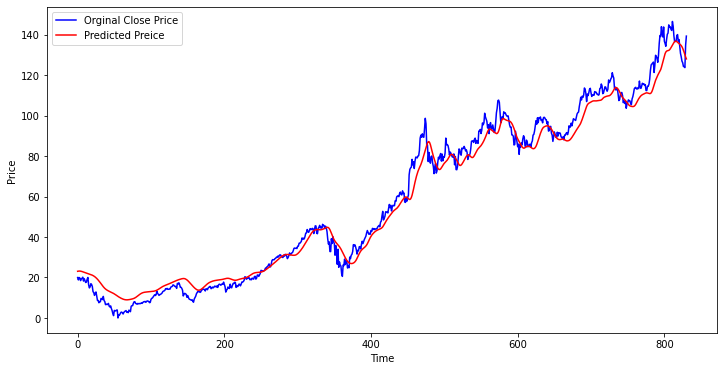

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Orginal Close Price')
plt.plot(y_predicted,'r',label='Predicted Preice')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2s
from math import sqrt

In [53]:
mean_abs_error=mae(y_test,y_predicted)
mean_squ_error=mse(y_test,y_predicted)
print(mean_abs_error)
print(mean_squ_error)

4.503114367154901
32.11081425452366


In [57]:
root_mean_squ_error=sqrt(mean_squ_error)
print(root_mean_squ_error)

5.666640473377825


In [58]:
r2_score=r2s(y_test,y_predicted)
print(r2_score)

0.9813169672499716
